# Connect to Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pycaret

# Load the data 

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# admissions = pd.read_csv('drive/MyDrive/DS/core/admissions.csv')
patients = pd.read_csv('drive/MyDrive/DS/core/patients.csv')
# transfer = pd.read_csv('drive/MyDrive/DS/core/transfers.csv')
# outevents = pd.read_csv('drive/MyDrive/DS/icu/outputevents.csv')
icu_stay = pd.read_csv('drive/MyDrive/DS/icu/icustays.csv')
# proce_events = pd.read_csv('drive/MyDrive/DS/icu/procedureevents.csv')
vital = pd.read_csv('drive/MyDrive/DS/ed/vitalsign.csv')

In [ ]:
patients_a = patients.drop(['anchor_year_group'],axis=1).set_index('subject_id')
vital_a = vital.drop(['rhythm','pain','charttime','stay_id'], axis=1).drop_duplicates('subject_id', keep='first').set_index('subject_id')

In [ ]:
data = pd.concat([patients_a, vital_a], axis=1)
data.head()

,gender,anchor_age,anchor_year,dod,temperature,heartrate,resprate,o2sat,sbp,dbp
subject_id,,,,,,,,,,
10000019,M,0,2129,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000032,F,52,2180,NaN,97.7,79.0,16.0,98.0,107.0,60.0
10000044,F,0,2150,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000048,F,23,2126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10000068,F,19,2160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data['dod']=data['dod'].replace(np.nan, 0, regex=True)
data['dod']=data['dod'].replace('-', 1, regex=True)

In [ ]:
data_full = data.dropna(how='any')
data_full.head()

,gender,anchor_age,anchor_year,dod,temperature,heartrate,resprate,o2sat,sbp,dbp
subject_id,,,,,,,,,,
10000032,F,52,2180,0,97.7,79.0,16.0,98.0,107.0,60.0
10000084,M,72,2160,0,97.5,78.0,16.0,100.0,114.0,71.0
10000108,M,25,2163,0,98.2,66.0,15.0,100.0,111.0,62.0
10000115,M,24,2154,0,97.6,81.0,18.0,99.0,120.0,71.0
10000117,F,48,2174,0,97.6,81.0,16.0,100.0,148.0,83.0


In [ ]:
data_aged = data_full[data_full['anchor_age'] != 0 ]
target = data_aged.pop('dod')
print("First five targets: \n", target[:5])
data_aged.head()

First five targets: 
 subject_id
10000032    0
10000084    0
10000108    0
10000115    0
10000117    0
Name: dod, dtype: object


,gender,anchor_age,anchor_year,temperature,heartrate,resprate,o2sat,sbp,dbp
subject_id,,,,,,,,,
10000032,F,52,2180,97.7,79.0,16.0,98.0,107.0,60.0
10000084,M,72,2160,97.5,78.0,16.0,100.0,114.0,71.0
10000108,M,25,2163,98.2,66.0,15.0,100.0,111.0,62.0
10000115,M,24,2154,97.6,81.0,18.0,99.0,120.0,71.0
10000117,F,48,2174,97.6,81.0,16.0,100.0,148.0,83.0


In [ ]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(data_aged.iloc[:,1:])
data_final = pd.DataFrame(scaler.transform(data_aged.iloc[:,1:]))
data_final.index = data_aged.index
data_final.insert(0,'gender',data_aged.loc[:,'gender'])
data_final.columns = data_aged.columns
data_final['gender'].replace('F', 0, regex=True, inplace=True)
data_final['gender'].replace('M', 1, regex=True, inplace=True)
data_final['gender'] = data_final['gender'].astype('float64')
data_final

,gender,anchor_age,anchor_year,temperature,heartrate,resprate,o2sat,sbp,dbp
subject_id,,,,,,,,,
10000032,0.0,0.246815,1.206029,-0.060682,-0.179865,-0.036234,-0.058041,-1.185107,-0.122444
10000084,1.0,1.224054,0.355922,-0.096181,-0.238606,-0.036234,0.170691,-0.851276,-0.049996
10000108,1.0,-1.072456,0.483438,0.028065,-0.943509,-0.064109,0.170691,-0.994347,-0.109271
10000115,1.0,-1.121318,0.100890,-0.078431,-0.062381,0.019516,0.056325,-0.565136,-0.049996
10000117,0.0,0.051368,0.950997,-0.078431,-0.062381,-0.036234,0.170691,0.770189,0.029037
...,...,...,...,...,...,...,...,...,...
19999636,0.0,-1.316766,1.461061,-0.255925,-0.121123,-0.036234,0.170691,-0.374375,0.002693
19999750,1.0,-0.095218,-0.324164,-0.060682,0.407554,0.131015,0.170691,2.105513,0.200277
19999784,1.0,0.491125,-1.386797,0.099063,-0.121123,0.019516,0.170691,1.390161,0.141002


# Auto ML

In [ ]:
automl_data = data_final.copy()
automl_data['target'] = target
automl_data_final = pd.concat([automl_data[automl_data['target']==1].iloc[:2000,:],automl_data[automl_data['target']==0].iloc[:2000*4,:]],axis=0)
automl_data_final

,gender,anchor_age,anchor_year,temperature,heartrate,resprate,o2sat,sbp,dbp,target
subject_id,,,,,,,,,,
10001884,0.0,1.028606,-1.259281,0.241058,-1.060992,-0.091984,-0.286773,1.247090,-0.017066,1
10005024,1.0,0.637711,-0.579196,0.134561,0.407554,-0.064109,-0.401139,-0.517445,-0.155374,1
10010058,1.0,1.614949,-0.536690,0.099063,-1.295960,-0.036234,0.170691,-1.709699,-0.181719,1
10010471,0.0,2.054706,0.143395,-0.184928,2.581002,0.131015,0.056325,0.197907,-0.069755,1
10011365,0.0,1.272916,0.228406,0.010316,-0.826025,-0.036234,0.056325,0.579428,-0.142202,1
...,...,...,...,...,...,...,...,...,...,...
10520661,0.0,1.126330,0.355922,0.045814,0.583780,-0.036234,-0.286773,2.343964,0.042210,0
10520862,1.0,0.393401,1.758598,-0.007434,-0.884767,-0.036234,0.170691,-0.278995,-0.063169,0
10520918,0.0,-1.121318,-0.876733,-0.007434,0.701263,0.131015,-0.401139,0.340977,-0.010479,0


In [ ]:
from pycaret.classification import *

clf1 = setup(data = automl_data_final, target = 'target',
preprocess = False,silent=True, session_id=42)

,Description,Value
0,session_id,42
1,Target,target
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(10000, 10)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,1
8,Transformed Train Set,"(6999, 9)"
9,Transformed Test Set,"(3001, 9)"


In [ ]:
# Train the model
rf = create_model('rf')
tuned_rf = tune_model(rf, optimize = 'Accuracy',early_stopping = True)

Accuracy     AUC  Recall   Prec.      F1   Kappa     MCC
Split  Fold                                                          
CV-Val 0       0.8243  0.8442  0.2628  0.6207  0.3692  0.2861  0.3220
       1       0.8343  0.8559  0.2701  0.6981  0.3895  0.3146  0.3624
       2       0.8257  0.8462  0.2628  0.6316  0.3711  0.2894  0.3271
       3       0.8129  0.8211  0.1971  0.5625  0.2919  0.2118  0.2508
       4       0.8229  0.8626  0.2044  0.6512  0.3111  0.2400  0.2937
       5       0.8129  0.8176  0.1884  0.5778  0.2842  0.2073  0.2508
       6       0.8329  0.8419  0.2681  0.6981  0.3874  0.3122  0.3604
       7       0.8200  0.8541  0.2319  0.6154  0.3368  0.2566  0.2978
       8       0.8314  0.8155  0.3043  0.6562  0.4158  0.3324  0.3661
       9       0.8212  0.8128  0.2774  0.5938  0.3781  0.2894  0.3181
       Mean    0.8238  0.8372  0.2467  0.6305  0.3535  0.2740  0.3149
       Std     0.0072  0.0177  0.0370  0.0439  0.0426  0.0411  0.0401
Train  NaN     0.8630  0.9084  0.3617  0.8584  0.5090  0.4443  0.5006

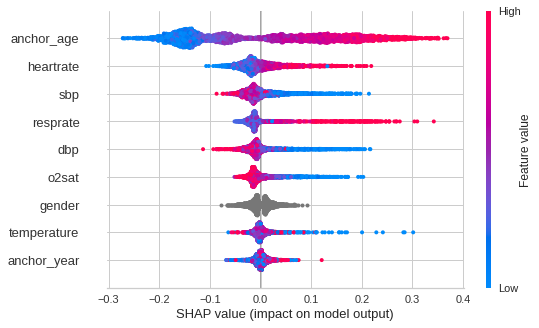

In [ ]:
interpret_model(rf,plot='summary')


# Appendix


In [ ]:
index_dead = list((target==1).index)
index_live = (target==0).index


In [ ]:
test=data_final.copy()
test['target']=target
test

,gender,anchor_age,anchor_year,temperature,heartrate,resprate,o2sat,sbp,dbp,target
subject_id,,,,,,,,,,
10000032,0,0.246815,1.206029,-0.060682,-0.179865,-0.036234,-0.058041,-1.185107,-0.122444,0
10000084,1,1.224054,0.355922,-0.096181,-0.238606,-0.036234,0.170691,-0.851276,-0.049996,0
10000108,1,-1.072456,0.483438,0.028065,-0.943509,-0.064109,0.170691,-0.994347,-0.109271,0
10000115,1,-1.121318,0.100890,-0.078431,-0.062381,0.019516,0.056325,-0.565136,-0.049996,0
10000117,0,0.051368,0.950997,-0.078431,-0.062381,-0.036234,0.170691,0.770189,0.029037,0
...,...,...,...,...,...,...,...,...,...,...
19999636,0,-1.316766,1.461061,-0.255925,-0.121123,-0.036234,0.170691,-0.374375,0.002693,0
19999750,1,-0.095218,-0.324164,-0.060682,0.407554,0.131015,0.170691,2.105513,0.200277,0
19999784,1,0.491125,-1.386797,0.099063,-0.121123,0.019516,0.170691,1.390161,0.141002,0


In [ ]:
automl_data.to_csv('ml.csv')

In [ ]:
pip install --use-deprecated=legacy-resolver pycaret[full]


     |████████████████████████████████| 318 kB 8.0 MB/s 
     |████████████████████████████████| 56 kB 4.0 MB/s 
     |████████████████████████████████| 86 kB 5.2 MB/s 
     |████████████████████████████████| 2.0 MB 36.9 MB/s 
     |████████████████████████████████| 261 kB 49.0 MB/s 
     |████████████████████████████████| 1.7 MB 49.5 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 16.5 MB 44.7 MB/s 
     |████████████████████████████████| 167 kB 69.1 MB/s 
     |████████████████████████████████| 114 kB 66.5 MB/s 
     |████████████████████████████████| 1.3 MB 53.2 MB/s 
     |████████████████████████████████| 6.8 MB 49.1 MB/s 
     |████████████████████████████████| 442 kB 52.1 MB/s 
     |████████████████████████████████| 59 kB 5.9 MB/s 
     |████████████████████████████████| 53 kB 1.7 MB/s 
     |█████████████████████